# Custom SGD For Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def MyCustomSGD(train_data,n_iter,learning_rate,k,divby):
    # Intial guess for w & b is set to zero
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    curr_iter=1
    while(curr_iter<=n_iter):
        
        # Randomly sampled k points from train_data
        temp=train_data.sample(k)
        
        # Divide train_data into x & y
        
        y=np.array(temp["PRICE"])
        x=np.array(temp.drop("PRICE",axis=1))
        
        # Set w_gradient & b_gradient to zero
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        # finding the gradient
        for i in range(k):
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+((-2)*x[i]*(y[i]-prediction))
            b_gradient=b_gradient+((-2)*(y[i]-prediction))
        
        # Compute w & b from the relation
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        # increase the iteration
        
        curr_iter +=1
        
        # Decrease the learning rate
        
        learning_rate=learning_rate/divby
        
    # Return w & b
        
    return w,b
    

In [21]:
# Construct predict function for prediction

def MyPredict(test_data,w,b):
    y_pred=[]
    for i in range(len(test_data)):
        y=np.asscalar(np.dot(w,test_data[i])+b)
        y_pred.append(y)
    return np.array(y_pred)
    

# Test My Custom SGD & Compare It With Scikitlearn SGD 

In [4]:
# Load the data
from sklearn import datasets
boston=datasets.load_boston()
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Add the target column
bos["PRICE"]=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Split train & test 
y=bos["PRICE"]
x=bos.drop("PRICE",axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [7]:
# Standardrized the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [8]:
# setup my data
train_data=pd.DataFrame(x_train,columns=boston.feature_names)
train_data["PRICE"]=np.array(y_train)
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.392549,0.906299,-1.281390,-0.26968,-0.695375,1.605534,0.149054,-0.337310,-0.289119,-1.069477,0.011627,0.446099,-0.840224,33.4
1,-0.385407,-0.501223,-0.350203,-0.26968,-0.278502,-0.184863,0.787839,-0.660908,-0.519115,-0.121043,1.154982,0.401204,-0.008246,20.1
2,-0.397037,3.017581,-1.303283,-0.26968,-1.190412,-0.192008,-1.033228,1.175611,-0.864109,-0.331806,-1.680538,0.412721,-0.703928,24.1
3,-0.262391,-0.501223,-0.411504,-0.26968,-0.122174,-1.037910,1.073704,-0.003931,-0.634113,-0.571842,1.200716,0.229302,1.225524,13.6
4,0.490179,-0.501223,1.042198,-0.26968,0.277329,-1.242241,0.978415,-0.656709,1.665846,1.529934,0.834843,-0.026525,0.816634,13.8


In [30]:
# Compute W & b by custom SGD and predict 
w,b=MyCustomSGD(train_data,1000,0.001,10,1)
x_test1=np.array(x_test)
y_pred_customsgd=MyPredict(x_test1,w,b)

In [31]:
# Check the performance
from sklearn.metrics import mean_squared_error
y_test=np.array(y_test)
mean_squared_error(y_test,y_pred_customsgd)

35.372877223720494

Text(0.5, 1.0, '$Y_i$ vs $\\hat{Y}_i$')

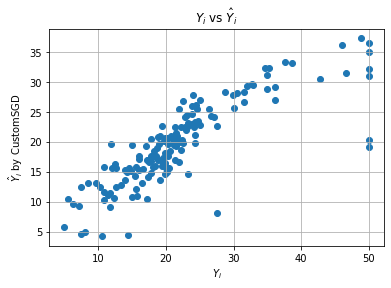

In [36]:
# Plot for Custom SGD
plt.scatter(y_test,y_pred_customsgd)
plt.grid()
plt.xlabel("$Y_i$")
plt.ylabel("$\hat{Y}_i$ by CustomSGD")
plt.title("$Y_i$ vs $\hat{Y}_i$")

In [32]:
# Computation by Scikitlearn SGD
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(max_iter=100)
clf.fit(x_train,y_train)
y_pred_sksgd=clf.predict(x_test)

In [33]:
mean_squared_error(y_test,y_pred_sksgd)

28.147017941741648

Text(0.5, 1.0, '$Y_i$ vs $\\hat{Y}_i$')

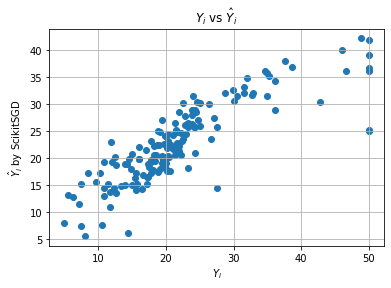

In [37]:
# Plot y vs y_hat for Scikitlearn SGD
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel("$Y_i$")
plt.ylabel("$\hat{Y}_i$ by ScikitSGD")
plt.title("$Y_i$ vs $\hat{Y}_i$")